In [7]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!ls

cdcgan		  dcgan      README.md		    stylegan2-ada-pytorch.zip
data_torch.ipynb  eda.ipynb  stylegan2-ada-pytorch


In [9]:
with open('/media/kirill/2tb/diploma/experiments/1/fid_results.txt','r') as fin:
    lines = fin.readlines()

In [10]:
epoches, scores = [], []
for line in lines:
    if line.startswith("""{"results": """):
        d = json.loads(line)
        epoches.append(int(d['snapshot_pkl'].split('.')[0].split('-')[-1]))
        scores.append(float(d['results']['fid50k_full']))

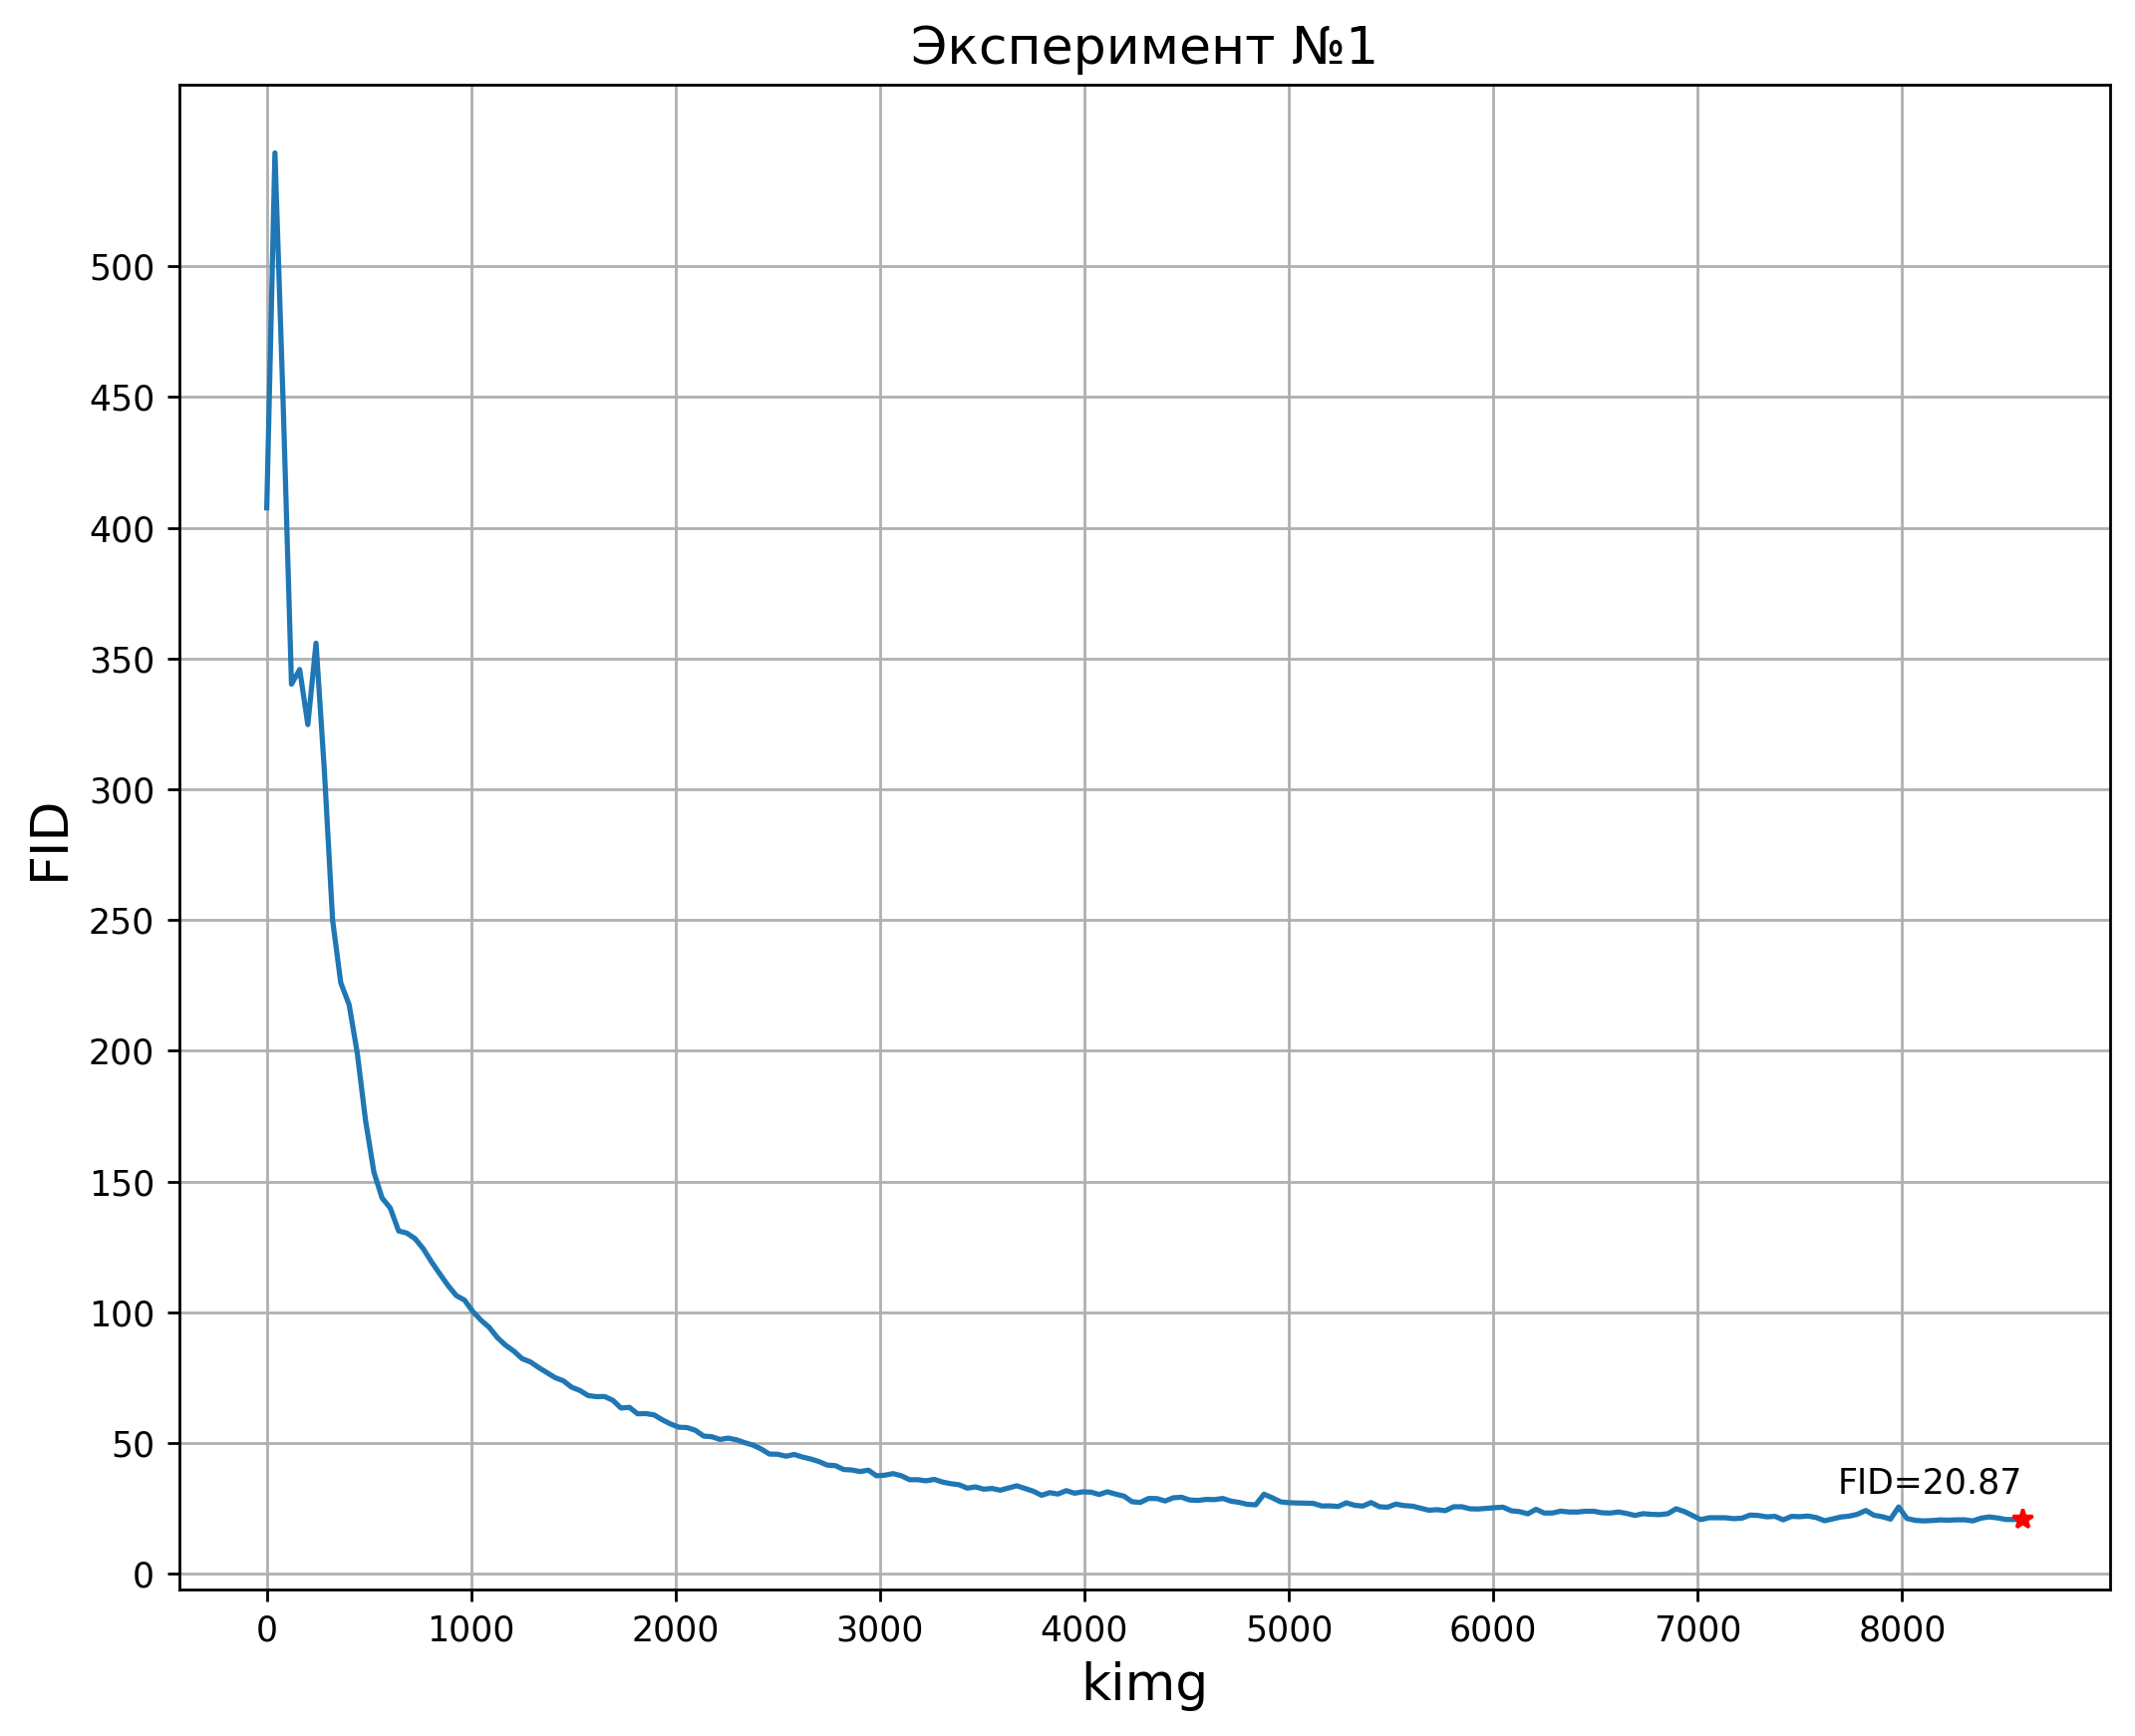

In [11]:
fig = plt.figure(figsize=(10, 8), dpi=250)
plt.plot(epoches, scores)
plt.xlabel("kimg", size=15)
plt.ylabel("FID", size=15)
plt.title("Эксперимент №1", size=15)
plt.xticks(np.arange(0, max(epoches), 1000, dtype=int))
plt.yticks(np.arange(0, max(scores), 50, dtype=int))
plt.plot(epoches[-1], scores[-1], marker='*', color='r')
plt.annotate(f'FID={scores[-1]:.2f}', (epoches[-1], scores[-1] + 10), ha='right')
plt.grid()